In [1]:
from src.data_processing.encoder import Encoder
from src import DATA_DIR



/Users/lkieu/PycharmProjects/Fair-Conference-Scheduling/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/lkieu/PycharmProjects/Fair-Conference-Scheduling/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import os

# Read the CSV file
csv_path = os.path.join(DATA_DIR, 'metadata', 'ICLR_2021_2024.csv')
df = pd.read_csv(csv_path)

# Get unique years and process each year
years = df['year'].unique()

for year in sorted(years):
    # Get dataframe for current year
    year_df = df[df['year'] == year]

    # Check for None/null in id
    id_nulls = year_df['id'].isnull().sum()

    # Check for empty strings or None/null in title, abstract, and authors
    title_empty = year_df['title'].isin(['', None]).sum() + year_df['title'].isnull().sum()
    abstract_empty = year_df['abstract'].isin(['', None]).sum() + year_df['abstract'].isnull().sum()
    authors_empty = year_df['authors'].isin(['', None]).sum() + year_df['authors'].isnull().sum()

    print(f"\nYear {year} Analysis:")
    print(f"Total papers: {len(year_df)}")
    print(f"Papers with null IDs: {id_nulls}")
    print(f"Papers with empty titles: {title_empty}")
    print(f"Papers with empty abstracts: {abstract_empty}")
    print(f"Papers with empty authors: {authors_empty}")

    if id_nulls > 0 or title_empty > 0 or abstract_empty > 0 or authors_empty > 0:
        print("WARNING: Found empty or null values!")


Year 2021 Analysis:
Total papers: 167
Papers with null IDs: 0
Papers with empty titles: 0
Papers with empty abstracts: 0
Papers with empty authors: 0

Year 2022 Analysis:
Total papers: 55
Papers with null IDs: 0
Papers with empty titles: 0
Papers with empty abstracts: 0
Papers with empty authors: 0

Year 2023 Analysis:
Total papers: 247
Papers with null IDs: 0
Papers with empty titles: 0
Papers with empty abstracts: 0
Papers with empty authors: 0

Year 2024 Analysis:
Total papers: 86
Papers with null IDs: 0
Papers with empty titles: 0
Papers with empty abstracts: 0
Papers with empty authors: 0


In [3]:
from tqdm import tqdm

for year in sorted(years):
    year_df = df[df['year'] == year]
    token_counts = []

    # Process each paper with a progress bar
    for _, paper in tqdm(year_df.iterrows(), total=len(year_df), desc=f"Processing {year}"):
        # Count tokens for authors (join the list into a string)
        authors_str = ', '.join(eval(paper['authors']))  # eval() since authors is stored as string representation of list
        print(authors_str)
        break
    break

Processing 2021:   0%|          | 0/167 [00:00<?, ?it/s]

Bo ZHAO, Konda Reddy Mopuri, Hakan Bilen


Processing 2024: 100%|██████████| 86/86 [00:00<00:00, 7570.95it/s]


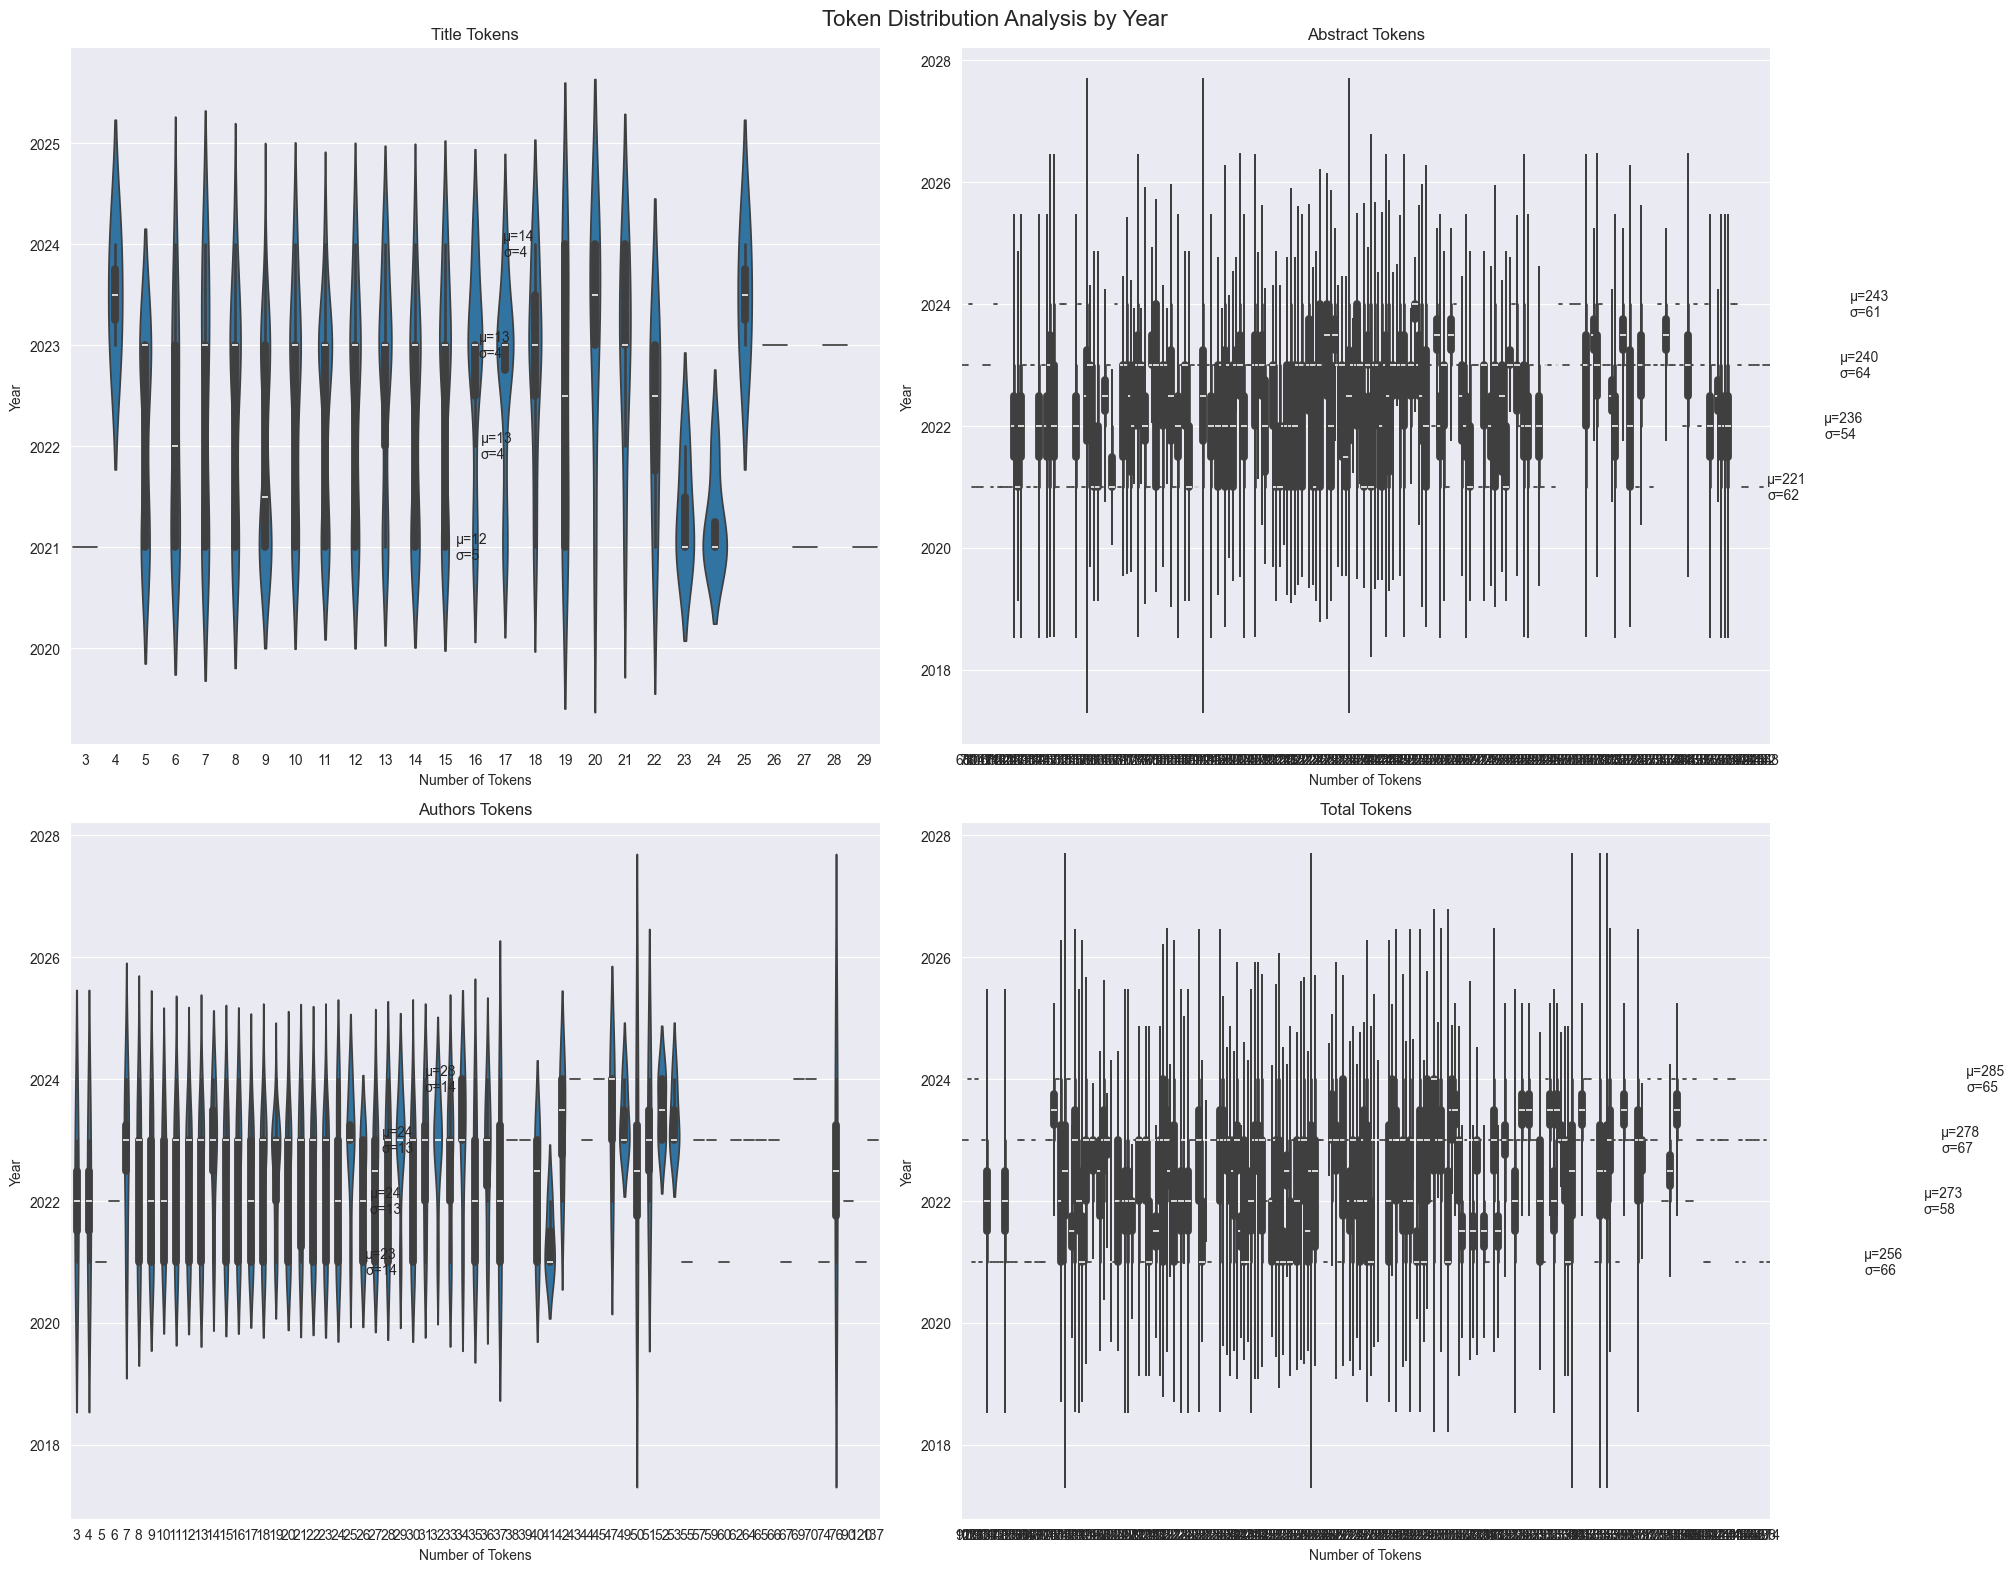


Detailed Token Statistics by Year:
--------------------------------------------------

Year 2021:

Title Tokens:
  Count: 167
  Mean: 12.36
  Std: 4.56
  Min: 3
  25%: 9.00
  50% (median): 12.00
  75%: 15.00
  Max: 29

Abstract Tokens:
  Count: 167
  Mean: 220.59
  Std: 61.85
  Min: 104
  25%: 177.50
  50% (median): 217.00
  75%: 249.50
  Max: 434

Authors Tokens:
  Count: 167
  Mean: 23.19
  Std: 13.80
  Min: 3
  25%: 15.50
  50% (median): 21.00
  75%: 27.00
  Max: 120

Total Tokens:
  Count: 167
  Mean: 256.14
  Std: 66.41
  Min: 126
  25%: 213.00
  50% (median): 252.00
  75%: 288.50
  Max: 514

Year 2022:

Title Tokens:
  Count: 55
  Mean: 13.18
  Std: 4.32
  Min: 5
  25%: 10.00
  50% (median): 13.00
  75%: 16.00
  Max: 24

Abstract Tokens:
  Count: 55
  Mean: 236.25
  Std: 54.45
  Min: 151
  25%: 191.00
  50% (median): 236.00
  75%: 271.50
  Max: 376

Authors Tokens:
  Count: 55
  Mean: 23.56
  Std: 13.57
  Min: 6
  25%: 15.50
  50% (median): 21.00
  75%: 27.50
  Max: 90

Total To

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm

# Initialize the encoder
encoder = Encoder("text-embedding-3-large")

# Lists to store all data
all_data = []

for year in sorted(years):
    year_df = df[df['year'] == year]

    # Process each paper with progress bar
    for _, paper in tqdm(year_df.iterrows(), total=len(year_df), desc=f"Processing {year}"):
        # Count tokens for each component
        title_tokens = encoder.count_tokens(paper['title'])
        abstract_tokens = encoder.count_tokens(paper['abstract'])
        authors_str = ', '.join(eval(paper['authors']))
        authors_tokens = encoder.count_tokens(authors_str)
        total_tokens = title_tokens + abstract_tokens + authors_tokens

        all_data.append({
            'year': year,
            'title_tokens': title_tokens,
            'abstract_tokens': abstract_tokens,
            'authors_tokens': authors_tokens,
            'total_tokens': total_tokens
        })

# Convert to DataFrame
df_tokens = pd.DataFrame(all_data)

# Create visualization
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Token Distribution Analysis by Year', fontsize=16)

components = ['title_tokens', 'abstract_tokens', 'authors_tokens', 'total_tokens']
titles = ['Title Tokens', 'Abstract Tokens', 'Authors Tokens', 'Total Tokens']

for idx, (component, title) in enumerate(zip(components, titles)):
    ax = axs[idx // 2, idx % 2]

    # Create violin plot
    sns.violinplot(data=df_tokens, x=component, y='year', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Number of Tokens')
    ax.set_ylabel('Year')

    # Add statistical annotations
    for year in sorted(years):
        year_data = df_tokens[df_tokens['year'] == year][component]
        ax.text(np.mean(year_data), year,
                f'μ={np.mean(year_data):.0f}\nσ={np.std(year_data):.0f}',
                verticalalignment='center')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Token Statistics by Year:")
print("-" * 50)
for year in sorted(years):
    print(f"\nYear {year}:")
    year_stats = df_tokens[df_tokens['year'] == year].describe()
    for component in components:
        print(f"\n{component.replace('_', ' ').title()}:")
        stats = year_stats[component]
        print(f"  Count: {stats['count']:.0f}")
        print(f"  Mean: {stats['mean']:.2f}")
        print(f"  Std: {stats['std']:.2f}")
        print(f"  Min: {stats['min']:.0f}")
        print(f"  25%: {stats['25%']:.2f}")
        print(f"  50% (median): {stats['50%']:.2f}")
        print(f"  75%: {stats['75%']:.2f}")
        print(f"  Max: {stats['max']:.0f}")

In [5]:
# Calculate totals for each year
yearly_stats = []
for year in sorted(years):
    year_data = df_tokens[df_tokens['year'] == year]
    total_tokens = year_data['total_tokens'].sum()
    num_papers = len(year_data)
    mean_tokens = year_data['total_tokens'].mean()

    yearly_stats.append({
        'year': year,
        'total_tokens': total_tokens,
        'num_papers': num_papers,
        'mean_tokens': mean_tokens
    })

# Print the results
print("\nToken Statistics by Year:")
print("-" * 50)
for stats in yearly_stats:
    print(f"\nYear {stats['year']}:")
    print(f"Total papers: {stats['num_papers']}")
    print(f"Total tokens: {int(stats['total_tokens']):,}")
    print(f"Mean tokens per paper: {stats['mean_tokens']:.2f}")


Token Statistics by Year:
--------------------------------------------------

Year 2021:
Total papers: 167
Total tokens: 42,775
Mean tokens per paper: 256.14

Year 2022:
Total papers: 55
Total tokens: 15,015
Mean tokens per paper: 273.00

Year 2023:
Total papers: 247
Total tokens: 68,682
Mean tokens per paper: 278.06

Year 2024:
Total papers: 86
Total tokens: 24,524
Mean tokens per paper: 285.16


In [7]:
# OpenAI cost calculation
for stats in yearly_stats:
    total_tokens = stats['total_tokens']
    # cost in cents
    large_cost = 0.000013
    large_total = large_cost * total_tokens / 100
    print(f"Year {stats['year']}:")
    print(f"model cost: ${large_total:.8f}")



Year 2021:
Small model cost: $0.00085550
Large model cost: $0.00556075
Total cost: $0.00641625
Year 2022:
Small model cost: $0.00030030
Large model cost: $0.00195195
Total cost: $0.00225225
Year 2023:
Small model cost: $0.00137364
Large model cost: $0.00892866
Total cost: $0.01030230
Year 2024:
Small model cost: $0.00049048
Large model cost: $0.00318812
Total cost: $0.00367860


In [9]:
def split_with_stride(text: str, window_size: int, stride: int) -> list[str]:
    """
    Splits text into overlapping chunks with a specified stride.

    Args:
        text (str): The input text.
        window_size (int): Length of each chunk.
        stride (int): Step size to move the window.

    Returns:
        list[str]: A list of text chunks.
    """
    chunks = []
    for i in range(0, len(text) - window_size + 1, stride):
        chunk = text[i:i + window_size]
        chunks.append(chunk)

    # Optionally include the last partial chunk if not already covered
    if len(text) > 0 and (len(text) - window_size) % stride != 0:
        chunks.append(text[-window_size:])

    return chunks

text = "The quick brown fox jumps over the lazy dog"
window_size = 10
stride = 5

chunks = split_with_stride(text, window_size, stride)
for i, c in enumerate(chunks):
    print(f"Chunk {i+1}: {repr(c)}")

Chunk 1: 'The quick '
Chunk 2: 'uick brown'
Chunk 3: 'brown fox '
Chunk 4: ' fox jumps'
Chunk 5: 'jumps over'
Chunk 6: ' over the '
Chunk 7: ' the lazy '


## Cost of all texts

Processing 2024: 100%|██████████| 86/86 [00:00<00:00, 118.24it/s]


Year 2021 Statistics:
Total papers: 167
Total tokens: 5,711,378
Mean tokens per paper: 34,199.87
Median tokens per paper: 31,200.00
Standard deviation: 11,996.54
Min tokens: 6,659
Max tokens: 102,776
Estimated cost: $0.74

Year 2022 Statistics:
Total papers: 55
Total tokens: 2,268,602
Mean tokens per paper: 41,247.31
Median tokens per paper: 37,391.00
Standard deviation: 16,079.89
Min tokens: 19,556
Max tokens: 109,786
Estimated cost: $0.29

Year 2023 Statistics:
Total papers: 247
Total tokens: 10,123,357
Mean tokens per paper: 40,985.25
Median tokens per paper: 36,184.00
Standard deviation: 15,822.93
Min tokens: 18,808
Max tokens: 120,120
Estimated cost: $1.32

Year 2024 Statistics:
Total papers: 86
Total tokens: 3,597,194
Mean tokens per paper: 41,827.84
Median tokens per paper: 38,917.50
Standard deviation: 16,436.99
Min tokens: 20,382
Max tokens: 132,613
Estimated cost: $0.47


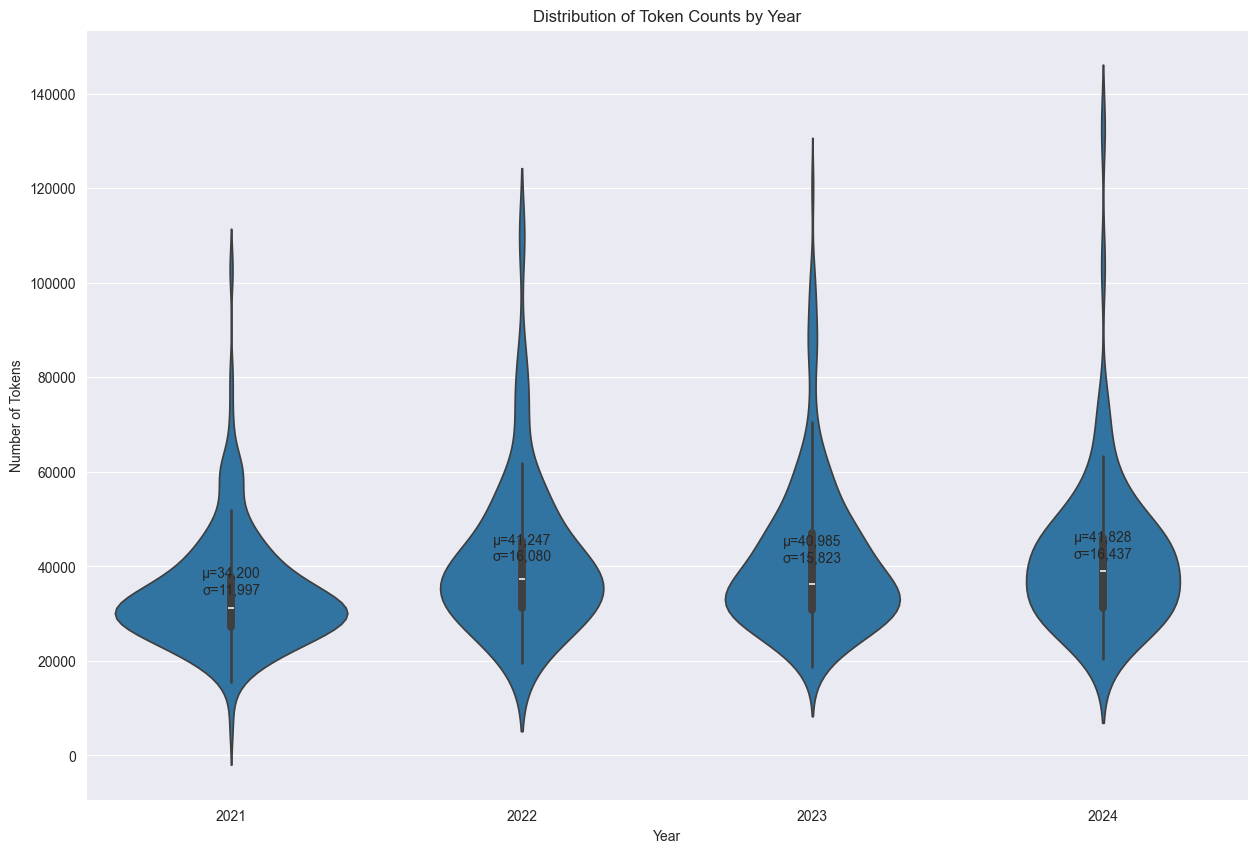

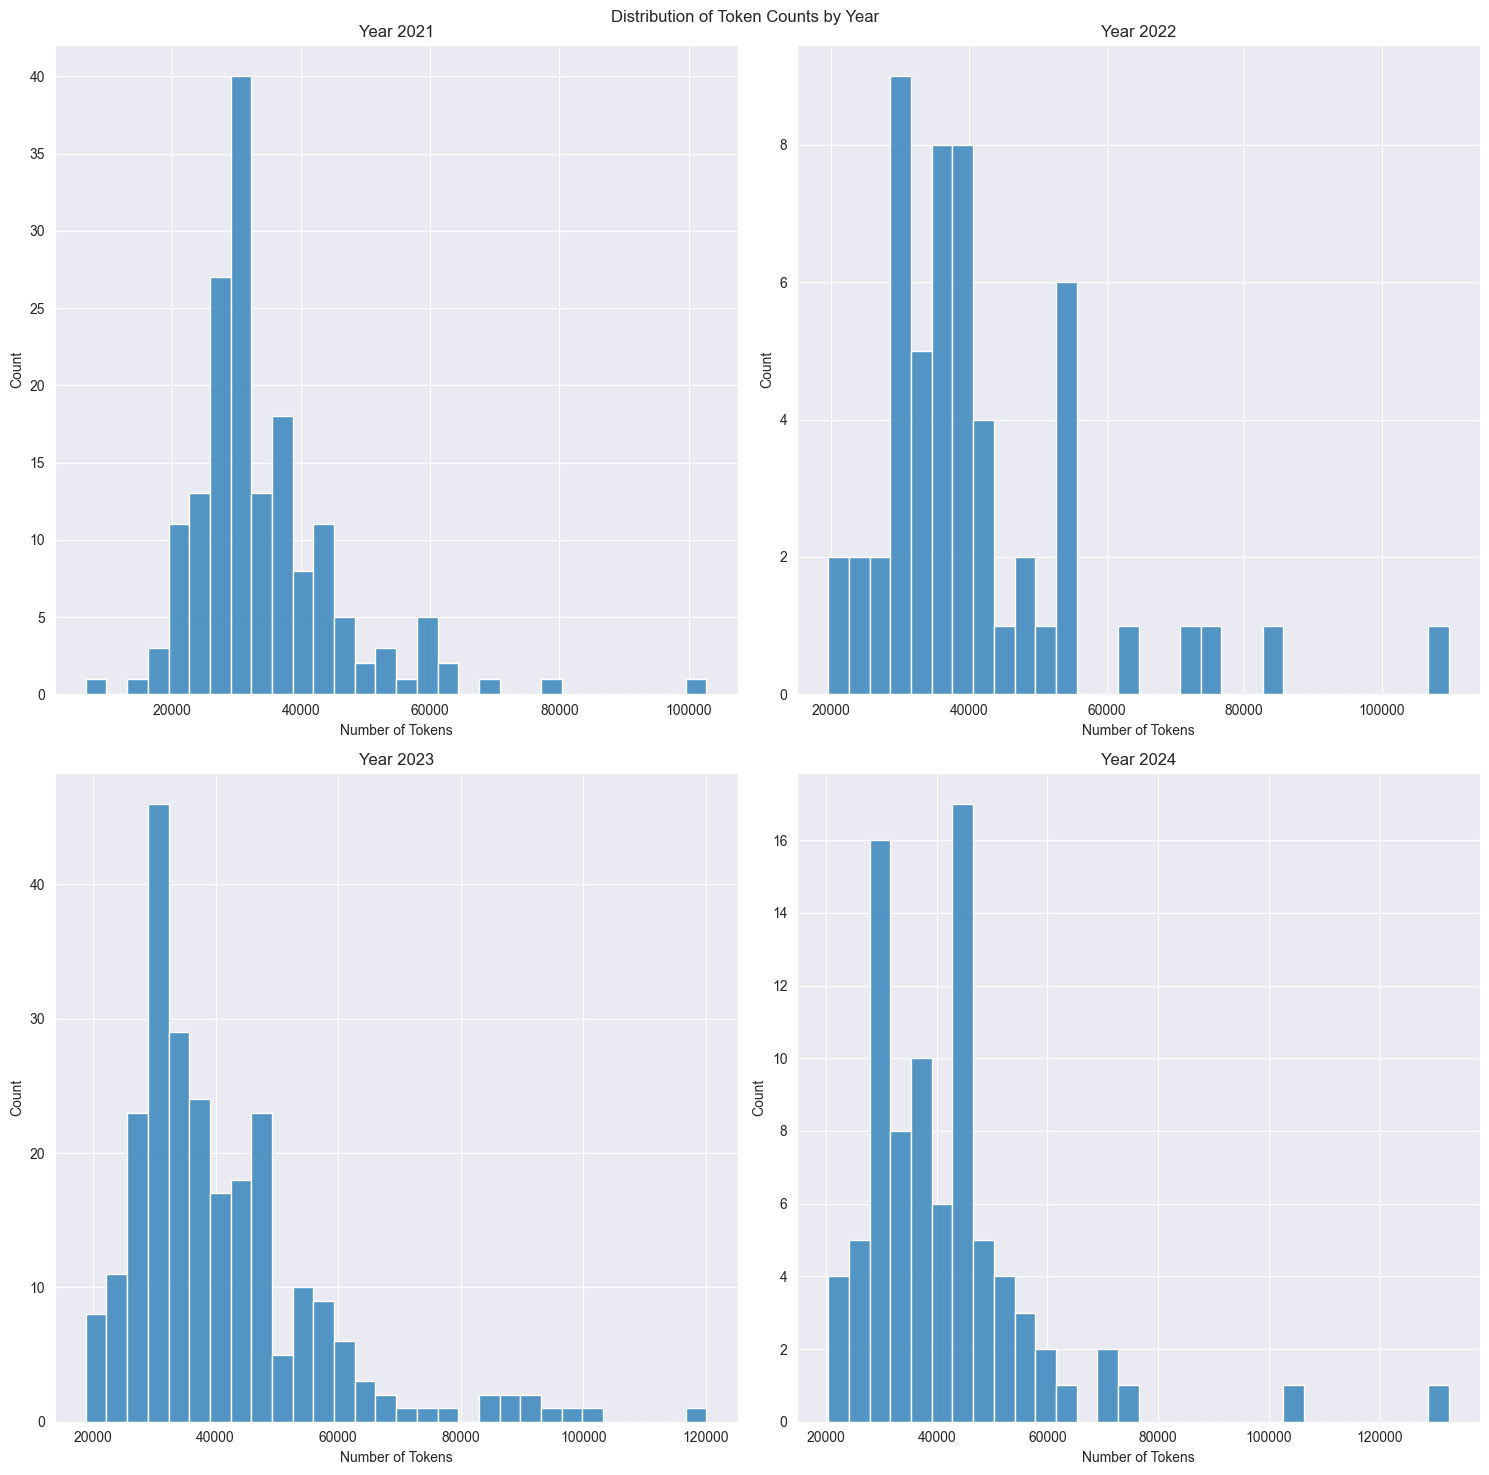

In [6]:
from src.data_processing.encoder import Encoder
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from src import DATA_DIR

# Initialize the encoder
encoder = Encoder("text-embedding-3-large", stride=7000)

# Lists to store data
all_data = []

# Process each year's JSON file
for year in range(2021, 2025):
    file_path = os.path.join(DATA_DIR, 'unified_text', 'ICLR_old', f'ICLR_{year}.json')
    
    with open(file_path, 'r', encoding='utf-8') as f:
        papers = json.load(f)

    # Process each paper
    for paper in tqdm(papers, desc=f"Processing {year}"):
        text = json.dumps(paper, ensure_ascii=False)
        if text:  # Only process if text exists
            token_count = encoder.count_tokens(text)

            all_data.append({
                'year': year,
                'title': paper['title'],
                'tokens': token_count
            })

# Convert to DataFrame
df_tokens = pd.DataFrame(all_data)

yearly_stats = []
for year in range(2021, 2025):
    year_data = df_tokens[df_tokens['year'] == year]
    stats = {
        'year': year,
        'total_papers': len(year_data),
        'total_tokens': year_data['tokens'].sum(),
        'mean_tokens': year_data['tokens'].mean(),
        'median_tokens': year_data['tokens'].median(),
        'std_tokens': year_data['tokens'].std(),
        'min_tokens': year_data['tokens'].min(),
        'max_tokens': year_data['tokens'].max()
    }
    yearly_stats.append(stats)

# Print statistics
for stats in yearly_stats:
    print(f"\nYear {stats['year']} Statistics:")
    print(f"Total papers: {stats['total_papers']}")
    print(f"Total tokens: {stats['total_tokens']:,}")
    print(f"Mean tokens per paper: {stats['mean_tokens']:,.2f}")
    print(f"Median tokens per paper: {stats['median_tokens']:,.2f}")
    print(f"Standard deviation: {stats['std_tokens']:,.2f}")
    print(f"Min tokens: {stats['min_tokens']:,}")
    print(f"Max tokens: {stats['max_tokens']:,}")

    # Calculate cost (using text-embedding-3-large pricing)
    cost = (stats['total_tokens'] * 0.000013) / 100  # Convert to dollars
    print(f"Estimated cost: ${cost:,.2f}")

plt.figure(figsize=(15, 10))

# Create violin plot
sns.violinplot(data=df_tokens, x='year', y='tokens')
plt.title('Distribution of Token Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tokens')

# Add statistical annotations
for year in range(2021, 2025):
    year_data = df_tokens[df_tokens['year'] == year]
    plt.text(year - 2021, year_data['tokens'].mean(),
             f'μ={year_data["tokens"].mean():,.0f}\nσ={year_data["tokens"].std():,.0f}',
             horizontalalignment='center')

plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Distribution of Token Counts by Year')

for idx, year in enumerate(range(2021, 2025)):
    ax = axes[idx // 2, idx % 2]
    year_data = df_tokens[df_tokens['year'] == year]

    sns.histplot(data=year_data, x='tokens', bins=30, ax=ax)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Number of Tokens')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import os
from src import DATA_DIR

# Read the CSV file 
csv_path = os.path.join(DATA_DIR, 'metadata', 'ICLR_2021_2024.csv')
df = pd.read_csv(csv_path)

# Filter for 2024 and count unique sessions
num_sessions_2024 = df[df['year'] == 2024]['session'].nunique()
print(f"Number of unique sessions in ICLR_old 2024: {num_sessions_2024}")
num_papers = df[df['year'] == 2024].shape[0]
print(f"Number of papers in ICLR_old 2024: {num_papers}")


Number of unique sessions in ICLR 2024: 32
Number of papers in ICLR 2024: 86


In [9]:
import json
input_path = os.path.join(DATA_DIR, 'unified_text', 'ICLR_old', f'ICLR_2024.json')
with open(input_path, 'r') as f:
    data = json.load(f)
ct = 0
for entry in data:
    ct += 1
ct

86

In [3]:
from src.data_processing.paper_info import get_paper_info
import os
from src import DATA_DIR


input_path = os.path.join(DATA_DIR, 'unified_text', 'ICLR_old', f'ICLR_2024.json')
id = 'gFR4QwK53h'
isinstance(get_paper_info(id, input_path), dict)


True